`Developing NLP and ML project:`
    
    - Collecting data
    - Understand Problem statement 
    - since it is text we need to follow NLP PipeLine
    - Developing ML Model
    - Testing model 
    - Save the model 
    - Load the model and test once again 
    - Depoly in any cloud [AWS , IBM , Google cloud , Mircosoft Azure , Heroku saleforce]
    

In [25]:
import numpy as np 
import pandas as pd 
import nltk 
from nltk.corpus import stopwords

`load the dataset and check whether important fetures are available or not:`

In [26]:
data = pd.read_csv('./spam.csv', encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [27]:
data.shape  # Number of rows and number of columns:

(5572, 5)

`Since feature 3 , 4 , 5 having lot of Null values I am going to check the count`

In [28]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [29]:
data.columns[2:]

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [30]:
for i in data.columns[2:]:
    print('Number of unique content in ',i,'is :',data[i].unique())

Number of unique content in  Unnamed: 2 is : [nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""'
 ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"'
 'this wont even start........ Datz confidence.."' 'GN' '.;-):-D"'
 'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""'
 ' bt not his girlfrnd... G o o d n i g h t . . .@"' ' I\'ll come up"'
 ' don\'t miss ur best life for anything... Gud nyt..."'
 ' just as a shop has to give a guarantee on what they sell. B. G."'
 ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"'
 ' the toughest is acting Happy with all unspoken pain inside..\\""'
 ' smoke hella weed\\""' '\\" not \\"what i need to do.\\""'
 'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD LUV\\""'
 ' justthought iåÕd sayhey! how u doin?nearly the endo

In [31]:
data = data.drop(data.columns[2:] , axis = 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
data = data.rename(columns={'v1':'target' , 'v2':'E-mails'})

In [33]:
data.head()

,target,E-mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


`let me find whether the data is balanced or not`

In [34]:
data['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

`It is a Imbalanced dataset but lets develop model with data what we have`

In [35]:
import matplotlib.pyplot as plt 

<AxesSubplot: xlabel='target', ylabel='count'>

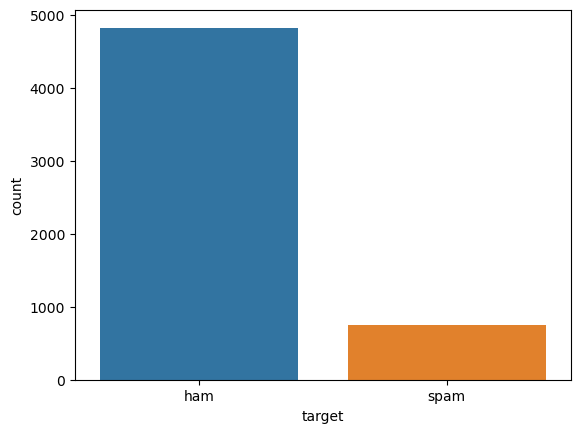

In [36]:
import seaborn as sns 
sns.countplot(x = data['target']) # countplot x , y cordinates:

In [37]:
data.head()

,target,E-mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


`There are few preprocessing techniques which gives lot of information to develop RNN Models`

#### Counting number of words in each independent data

In [38]:
data['word_count'] = data['E-mails'].apply(lambda x: len(x.split()))

In [39]:
data.head()

,target,E-mails,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [40]:
data['E-mails'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#### character count 

In [41]:
def character_count(text):
    count = 0
    c = ''
    for i in text:
        c+=i
        count+=1
    return count

In [42]:
text = 'I am kamal'  # 10 characters:
character_count(text)

10

In [43]:
data['character_count'] = data['E-mails'].apply(lambda x: character_count(str(x)))

In [44]:
data.head()

,target,E-mails,word_count,character_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61


### Average count()

In [45]:
data['Average_count'] = data['character_count'] / data['word_count']

In [46]:
data.head()

,target,E-mails,word_count,character_count,Average_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308


#### stopwords count 

In [47]:
data['stopwords_count'] = data['E-mails'].apply(lambda x:len([i for i in x.split() if i in stopwords.words('english')]))

In [48]:
data.head()

,target,E-mails,word_count,character_count,Average_count,stopwords_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5


#### Number count:

In [49]:
data['Number_count'] = data['E-mails'].apply(lambda x: len([i for i in x if i.isdigit()]))

In [50]:
data.head()

,target,E-mails,word_count,character_count,Average_count,stopwords_count,Number_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


In [51]:
data['E-mails'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

`Preprocess the data`

- clean the data [punctuations]
- lower text 
- remove stopwords
- Apply stemming or lematization 

In [52]:
data['target'] = data['target'].map({'ham':0 , 'spam':1}).astype(int)

`In the target feature 0-> good incoming mail and 1-> Bad incoming Mail`

In [53]:
data.head()

,target,E-mails,word_count,character_count,Average_count,stopwords_count,Number_count
0,0,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,0,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,0,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


`Lets solve indepedent feature:`

`regex -> is an regular expressions which is used to find patterns in the text data`


`regex : https://docs.python.org/3/library/re.html`
        

In [54]:
a = 'I am computer 230 vision scientist 35 and my mbl number is 7337513242'
c = ''
for i in a:
    if i.isnumeric():
        c+=i
print(c)

230357337513242


`In this regex d refers to numbers`

In [55]:
import re 
a = 'I am computer 230 vision scientist 35 and my mbl number is 7337513242'

sol = re.findall('\d{10}' , a)

print(sol)

['7337513242']


`Using regex I am collecting only text and numbers`

- Ex: Bring me 10 apples from the supermarket:
- Ex: Bring me apples from the supermarket: 

In [56]:
data.head()

,target,E-mails,word_count,character_count,Average_count,stopwords_count,Number_count
0,0,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,0,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,0,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


`regex sub: keep what we want and removes what we dont want:`

In [57]:
a = 'I am computer 230 .&* vision scientist 35 and my mbl number is 7337513242'
sol = re.sub('[^a-zA-Z]',' ',a)
sol

'I am computer         vision scientist    and my mbl number is           '

`Applying same logic for first row:`
    

In [58]:
print(data['E-mails'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [59]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
s = PorterStemmer()

In [60]:
sol = re.sub('[^a-zA-Z0-9]',' ',data['E-mails'][0])
print(sol)
sol = sol.lower()
sol = sol.split()
sol = [i for i in sol if i not in stopwords.words('english')]
sol = [s.stem(j) for j in sol]
sol = ' '.join(sol)
print()
print(sol)

Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [61]:
data.head()

,target,E-mails,word_count,character_count,Average_count,stopwords_count,Number_count
0,0,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,0,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,0,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


In [62]:
# preprocessing:
clean_text = []
for i in data.index:
    sol = re.sub('[^a-zA-Z0-9]',' ',data['E-mails'][i])
    sol = sol.lower()
    sol = sol.split()
    sol = [i for i in sol if i not in stopwords.words('english')]
    sol = [s.stem(j) for j in sol]
    sol = ' '.join(sol)
    clean_text.append(sol)
    

In [63]:
clean_text

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

`On the top if raw data I applied word count , character count , stopwords count , average count , number count and preprocess the complete Now my independent var is cleaned`


`conveting text into numbers but not with tfidf Now i am using padding technique and for model development I am using RNN models`


In [64]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [65]:
clean_text[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [66]:
voc_size = 1000

vectors = [one_hot(i , voc_size) for i in clean_text]

vectors

[[526,
  150,
  750,
  499,
  500,
  868,
  397,
  99,
  800,
  561,
  710,
  913,
  577,
  984,
  325,
  913],
 [876, 732, 939, 973, 177, 729],
 [90,
  709,
  710,
  695,
  834,
  423,
  455,
  455,
  748,
  643,
  189,
  155,
  181,
  21,
  455,
  363,
  693,
  709,
  110,
  655,
  38,
  672,
  401,
  223,
  991],
 [177, 495, 772, 306, 390, 177, 401, 482, 772],
 [455, 927, 3, 911, 990, 833, 781],
 [924,
  345,
  332,
  862,
  449,
  191,
  56,
  107,
  519,
  519,
  428,
  876,
  142,
  655,
  624,
  766,
  140,
  541,
  451],
 [778, 171, 107, 75, 597, 107, 213, 748],
 [336,
  699,
  51,
  51,
  383,
  948,
  342,
  212,
  561,
  447,
  687,
  544,
  749,
  443,
  636,
  447],
 [505,
  429,
  257,
  952,
  491,
  506,
  42,
  753,
  243,
  43,
  845,
  695,
  43,
  637,
  220,
  872,
  546,
  856],
 [380,
  448,
  991,
  177,
  590,
  324,
  385,
  363,
  239,
  380,
  942,
  90,
  845,
  380,
  385,
  736,
  90,
  806],
 [402, 539, 88, 715, 532, 484, 46, 738, 568, 941, 118, 315],
 [

#### padding technique

In [67]:
c = []
for i in vectors:
    c.append(len(i))
print(c)

[16, 6, 25, 9, 7, 19, 8, 16, 18, 18, 12, 23, 20, 15, 2, 16, 3, 12, 7, 24, 3, 7, 6, 15, 5, 15, 3, 12, 7, 7, 9, 18, 3, 5, 14, 14, 5, 4, 4, 11, 9, 11, 18, 1, 9, 4, 5, 4, 8, 15, 5, 17, 10, 21, 18, 8, 23, 4, 2, 5, 10, 8, 3, 6, 18, 14, 13, 23, 7, 4, 6, 2, 7, 3, 2, 4, 6, 5, 3, 6, 3, 3, 5, 2, 3, 5, 13, 16, 4, 8, 6, 17, 21, 15, 16, 14, 6, 5, 21, 6, 13, 9, 16, 19, 7, 9, 4, 8, 12, 4, 3, 3, 17, 18, 18, 17, 19, 10, 9, 17, 19, 5, 20, 6, 5, 2, 17, 1, 19, 4, 1, 5, 3, 20, 28, 5, 2, 4, 20, 11, 3, 3, 20, 4, 4, 6, 19, 9, 3, 5, 3, 11, 4, 16, 35, 2, 2, 10, 12, 18, 10, 7, 6, 22, 22, 7, 17, 9, 8, 7, 7, 17, 3, 13, 7, 7, 4, 17, 6, 12, 14, 3, 5, 2, 4, 13, 3, 16, 5, 13, 9, 18, 4, 10, 8, 6, 4, 8, 13, 4, 4, 12, 20, 3, 5, 10, 17, 5, 10, 5, 6, 3, 5, 3, 3, 6, 5, 7, 4, 13, 5, 17, 3, 19, 20, 7, 24, 5, 19, 3, 15, 4, 4, 6, 25, 6, 7, 2, 16, 17, 6, 6, 6, 24, 4, 5, 3, 5, 14, 21, 7, 27, 0, 18, 4, 7, 6, 2, 16, 6, 1, 11, 6, 17, 3, 4, 6, 24, 4, 15, 5, 18, 21, 7, 3, 1, 5, 3, 4, 6, 3, 4, 4, 1, 14, 7, 1, 20, 14, 20, 5, 9, 4, 2, 5, 

In [68]:
print(max(c))

78


In [69]:
sent_length = 78

pad_vectors = pad_sequences(vectors , maxlen=sent_length, padding='post')
pad_vectors

array([[526, 150, 750, ...,   0,   0,   0],
       [876, 732, 939, ...,   0,   0,   0],
       [ 90, 709, 710, ...,   0,   0,   0],
       ...,
       [ 58, 679, 190, ...,   0,   0,   0],
       [586, 188,  66, ...,   0,   0,   0],
       [ 79, 506, 352, ...,   0,   0,   0]])

In [70]:
#### Independent data 
pad_vectors

array([[526, 150, 750, ...,   0,   0,   0],
       [876, 732, 939, ...,   0,   0,   0],
       [ 90, 709, 710, ...,   0,   0,   0],
       ...,
       [ 58, 679, 190, ...,   0,   0,   0],
       [586, 188,  66, ...,   0,   0,   0],
       [ 79, 506, 352, ...,   0,   0,   0]])

In [71]:
### dependent data
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

`https://colah.github.io/posts/2015-08-Understanding-LSTMs/index.html`

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,LSTM,Activation,Bidirectional
from tensorflow.keras.activations import sigmoid,relu,tanh,softmax


In [74]:
model = Sequential()

model.add(Embedding(voc_size , 10 , input_length=sent_length))  # Embedded layer:
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))


In [75]:
model.compile(optimizer='adam' , loss='binary_crossentropy',metrics=['Acc'])


In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 78, 10)            10000     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              88800     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 99,001
Trainable params: 99,001
Non-trainable params: 0
_________________________________________________________________


In [77]:
X = np.array(pad_vectors)
y = np.array(data['target'])

In [78]:
from sklearn.model_selection import train_test_split


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
len(X_train)

3733

In [81]:
model.fit(X_train , y_train , batch_size=32 ,epochs=20)

Epoch 1/20
117/117 [==============================] - 8s 43ms/step - loss: 0.3198 - Acc: 0.8886
Epoch 2/20
117/117 [==============================] - 5s 43ms/step - loss: 0.0899 - Acc: 0.9740
Epoch 3/20
117/117 [==============================] - 6s 47ms/step - loss: 0.0499 - Acc: 0.9839
Epoch 4/20
117/117 [==============================] - 7s 62ms/step - loss: 0.0315 - Acc: 0.9925
Epoch 5/20
117/117 [==============================] - 6s 51ms/step - loss: 0.0426 - Acc: 0.9882
Epoch 6/20
117/117 [==============================] - 5s 44ms/step - loss: 0.0188 - Acc: 0.9957
Epoch 7/20
117/117 [==============================] - 6s 48ms/step - loss: 0.0133 - Acc: 0.9965
Epoch 8/20
117/117 [==============================] - 5s 45ms/step - loss: 0.0082 - Acc: 0.9981
Epoch 9/20
117/117 [==============================] - 6s 48ms/step - loss: 0.0066 - Acc: 0.9989
Epoch 10/20
117/117 [==============================] - 5s 44ms/step - loss: 0.0056 - Acc: 0.9987
Epoch 11/20
117/117 [==================

In [82]:
## test validation report:


In [83]:
y_test_pred = model.predict(X_test)

y_test_pred

58/58 [==============================] - 1s 12ms/step


array([[3.4770266e-05],
       [8.0567168e-04],
       [9.9987555e-01],
       ...,
       [8.3031773e-06],
       [1.2157689e-04],
       [9.9999565e-01]], dtype=float32)

In [84]:
c = []
for i in y_test_pred:
    if i > 0.5:
        c.append(1)
    else:
        c.append(0)

In [85]:
c

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [86]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [87]:
accuracy_score(y_test,c)

0.9766177270255574

In [88]:
confusion_matrix(y_test, c)

array([[1574,   13],
       [  30,  222]], dtype=int64)

In [89]:
print(classification_report(y_test , c))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1587
           1       0.94      0.88      0.91       252

    accuracy                           0.98      1839
   macro avg       0.96      0.94      0.95      1839
weighted avg       0.98      0.98      0.98      1839



### Working with real data :

In [91]:
a = ['the discount is 20% in this offer pls buy it']
c = []
sol = re.sub('[^a-zA-Z0-9]',' ',a[0])
sol = sol.lower()
sol = sol.split()
sol = [i for i in sol if i not in stopwords.words('english')]
sol = [s.stem(j) for j in sol]
c.append(' '.join(sol))
print(sol)
print(c)
ve = [one_hot(i,voc_size) for i in c]
print(ve)
sent_length = 78
pad_vectors = pad_sequences(ve , maxlen=sent_length, padding='post')
print(pad_vectors)
if model.predict(pad_vectors) > 0.5:
    print('Spam mail')
else:
    print('Ham mail')
    

['discount', '20', 'offer', 'pl', 'buy']
['discount 20 offer pl buy']
[[352, 477, 635, 563, 609]]
[[352 477 635 563 609   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]]
1/1 [==============================] - 0s 22ms/step
Ham mail
